In [2]:
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cliente = pymongo.MongoClient()
cliente.list_database_names()
db = cliente.companies
db.collection_names()
colec = db.com

<ipython-input-3-cc278c9a9206>:4: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  db.collection_names()


In [4]:
#list(colec.find())
import pandas as pd 
import numpy as np
import folium



oficinas = colec.find()

df = pd.DataFrame(oficinas)
df.columns
df1 = df

df = df.reset_index()
df.loc[df['number_of_employees'].idxmax()]



display(df.iloc[5776]['offices'])
list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'offices.zip_code': '80333'}]},{'name':1}))
m = folium.Map(location=[48.143954756384524, 11.575684547424318], tiles='stamentoner', zoom_start=15)
lat_siemenz= '48.143954756384524'
lon_siemenz = '11.575684547424318'
zeblat = '48.1365635'
zeblon = '11.5886703'
Brien_lat = '48.1469267'
Brien_lon = '11.560622'
IDEO_lat= '48.130541'
IDEO_lon = '11.5952663'

empresas_names = ['Siemens', 'MegaZebra', 'IDEO']
empresas_lat = ['48.143954756384524', '48.1365635', '48.130541']
empresas_lon = ['11.575684547424318','11.5886703','11.5952663']
### pon las otras dos empresas 
lat_tacos = ['48.1503616','48.1427', '48.1332057']
lon_tacos = ['11.5783252', '11.5552', '11.5836412']
#folium.Marker([lat, lon],icon=folium.Icon(color='red'), popup='<i>Siemens</i>', tooltip='Siemens').add_to(m)
#folium.Marker([zeblat, zeblon], icon=folium.Icon(color='red'), popup='<i>Megazebra</i>', tooltip='Megazebra').add_to(m)
for i in range(len(lat_tacos)):
    folium.Marker([lat_tacos[i], lon_tacos[i]], icon=folium.Icon(color='blue'),popup = '<b>Aqui hay una taqueria</b>', tooltip = 'taqueria').add_to(m)
for i in range(len(empresas_names)) :
    folium.Marker([empresas_lat[i], empresas_lon[i]], icon= folium.Icon(color='red'), popup = f'<b>{empresas_names[i]}</b>', tooltip = f'{empresas_names[i]}').add_to(m)
m

[{'description': '',
  'address1': 'Wittelsbacherplatz 2',
  'address2': '',
  'zip_code': '80333',
  'city': 'Munich',
  'state_code': None,
  'country_code': 'DEU',
  'latitude': None,
  'longitude': None}]

In [5]:
df['ipo'][4]
#df[['name','total_money_raised']].sort_values(by = 'total_money_raised', ascending=False).head(10)
                                                                                              
## relacion entre precio actual con total money raised, funding rounds ipo and today price (esa la debes buscar tu )

{'valuation_amount': 104000000000,
 'valuation_currency_code': 'USD',
 'pub_year': 2012,
 'pub_month': 5,
 'pub_day': 18,
 'stock_symbol': 'NASDAQ:FB'}

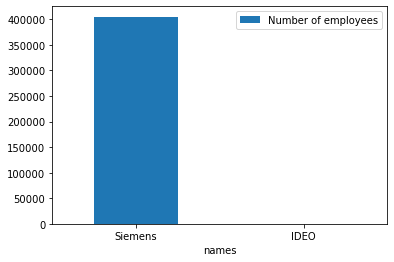

In [27]:


list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'name': 'Siemens' }]},{'name':1, 'number_of_employees' :1}))
##405000 Siemens employees

list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'name': 'MegaZebra' }]},{'name':1, 'number_of_employees' :1}))

### MEGAZEBRA number of employees NAN

list(colec.find({'$and':[{"offices.city":'Munich'},
                            {'name': 'IDEO' }]},{'name':1, 'number_of_employees' :1}))

##IDEO number of employees 500


data = [['Siemens', 405000], ['IDEO', 500]]

#DF = pd.DataFrame(data, columns = ['Name', 'Number of employees'])
#ax = DF.plot.bar(rot = 0)


DF = pd.DataFrame({'names': ['Siemens', 'IDEO'], 'Number of employees': [405000, 500]})
ax = DF.plot.bar(x = 'names', y = 'Number of employees', rot = 0)


## por lo visto lo mejor es ponerla cerca de Siemens 

In [28]:
#list(colec.find({"offices.city":'Munich'},{'name':1, 'number_of_employees' : 1}))

#list(colec.find({'$and':[{'number_of_employees': {'$gte': 500}},
 #                           {'offices.city':'Munich'}]}, 
 #              {'name':1}))

In [19]:
#df['City'] = pd.DataFrame([x for x in df['offices']])['country_code'] no reconoce la columna dentro del diccionario 

#df1 = pd.DataFrame(MyList, columns=["x"]).groupby('x').size().to_dict() sirve para hacer df la lista que obtengas

#cities = [d.get('city') for d in df.dic] Dataframe has not atribute dic






###juntalos por ciudad en el dataframe

#df2['city'].value_counts()
##San francisco the city with more companies in this df



#d = df3.groupby(['city'])['number_of_employees'].agg('sum').max()
#d

#66777 es el numero mas grande de empleados 
#d.idxmax()
#New york
#print (d[(d == 'San francisco').all()])


###lo que te falta esta en notas 
#poner las otras dos locaciones de empresas ya tienes lat y long
#hacer una grafica del numero de empelados de cada una
#haces los labs e intentas otra vez sacar la ciudad con mas empleados 






,index,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,1,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431
2,2,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
3,3,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
4,4,None,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523
5,5,Headquarters,1601 Willow Road,,94025,Menlo Park,CA,USA,37.416050,-122.151801
6,6,Europe HQ,,,,Dublin,None,IRL,53.344104,-6.267494
7,7,New York,340 Madison Ave,,10017,New York,NY,USA,40.755716,-73.979247
8,8,,Suite 200,654 High Street,94301,Palo Alto,CA,ISR,NaN,NaN
9,9,None,"959 Skyway Road, Suite 200",None,94070,San Carlos,CA,USA,37.506885,-122.247573


In [77]:
dx=df1.set_index(['name']).offices.apply(pd.Series).stack().index

df2 =pd.DataFrame(df1.set_index(['name']).offices.apply(pd.Series).stack().values.tolist()).reset_index()

#df2.head(10)

df3 = pd.concat([df1, df2], axis = 1)
df3.fillna(0)



,_id,name,permalink,crunchbase_url,homepage_url,blog_url,blog_feed_url,twitter_username,category_code,number_of_employees,...,index,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,52cdef7c4bab8bd675297d8a,Wetpaint,abc2,http://www.crunchbase.com/company/wetpaint,http://wetpaint-inc.com,http://digitalquarters.net/,http://digitalquarters.net/feed/,BachelrWetpaint,web,47.0,...,0.0,,710 - 2nd Avenue,Suite 1100,98104,Seattle,WA,USA,47.603122,-122.333253
1,52cdef7c4bab8bd675297d8b,AdventNet,abc3,http://www.crunchbase.com/company/adventnet,http://adventnet.com,,,manageengine,enterprise,600.0,...,1.0,,270 Lafayette Street,Suite 505,10012,New York,NY,USA,40.723731,-73.996431
2,52cdef7c4bab8bd675297d8c,Zoho,abc4,http://www.crunchbase.com/company/zoho,http://zoho.com,http://blogs.zoho.com/,http://blogs.zoho.com/feed,zoho,software,1600.0,...,2.0,Headquarters,4900 Hopyard Rd.,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
3,52cdef7c4bab8bd675297d8d,Digg,digg,http://www.crunchbase.com/company/digg,http://www.digg.com,http://blog.digg.com/,http://blog.digg.com/?feed=rss2,digg,news,60.0,...,3.0,Headquarters,4900 Hopyard Rd,Suite 310,94588,Pleasanton,CA,USA,37.692934,-121.904945
4,52cdef7c4bab8bd675297d8e,Facebook,facebook,http://www.crunchbase.com/company/facebook,http://facebook.com,http://blog.facebook.com,http://blog.facebook.com/atom.php,facebook,social,5299.0,...,4.0,0,135 Mississippi St,,94107,San Francisco,CA,USA,37.764726,-122.394523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18796,52cdef7f4bab8bd67529c6f6,Adhunk,adhunk,http://www.crunchbase.com/company/adhunk,http://www.adhunk.com,http://blog.adhunk.com,http://blog.adhunk.com/feed,,advertising,3.0,...,0.0,0,0,0,0,0,0,0,0.000000,0.000000
18797,52cdef7f4bab8bd67529c6f7,AfterLogic,afterlogic,http://www.crunchbase.com/company/afterlogic,http://www.afterlogic.com,,,afterlogic,software,0.0,...,0.0,0,0,0,0,0,0,0,0.000000,0.000000
18798,52cdef7f4bab8bd67529c6f8,goBookmaker,gobookmaker,http://www.crunchbase.com/company/gobookmaker,http://www.gobookmaker.com,http://blog.gobookmaker.com,,gobookmaker,web,0.0,...,0.0,0,0,0,0,0,0,0,0.000000,0.000000
18799,52cdef7f4bab8bd67529c6f9,EnteGreat Solutions,entegreat-solutions,http://www.crunchbase.com/company/entegreat-so...,,,,,software,0.0,...,0.0,0,0,0,0,0,0,0,0.000000,0.000000


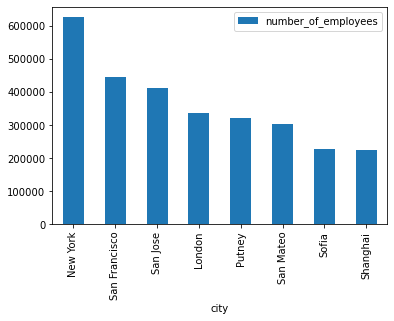

In [76]:
##pon en el mapa todas las compañias que esten en sanfrancisco

df4 = df3.groupby('city')['number_of_employees'].sum().reset_index().sort_values('number_of_employees', ascending= False).head(8)
df4.plot(x = 'city', y = 'number_of_employees',kind='bar') 


In [7]:
df.columns

Index(['index', '_id', 'name', 'permalink', 'crunchbase_url', 'homepage_url',
       'blog_url', 'blog_feed_url', 'twitter_username', 'category_code',
       'number_of_employees', 'founded_year', 'founded_month', 'founded_day',
       'deadpooled_year', 'tag_list', 'alias_list', 'email_address',
       'phone_number', 'description', 'created_at', 'updated_at', 'overview',
       'image', 'products', 'relationships', 'competitions', 'providerships',
       'total_money_raised', 'funding_rounds', 'investments', 'acquisition',
       'acquisitions', 'offices', 'milestones', 'video_embeds', 'screenshots',
       'external_links', 'partners', 'deadpooled_month', 'deadpooled_day',
       'deadpooled_url', 'ipo'],
      dtype='object')

In [8]:
print(df['ipo'][4])
print(df['total_money_raised'][4])

{'valuation_amount': 104000000000, 'valuation_currency_code': 'USD', 'pub_year': 2012, 'pub_month': 5, 'pub_day': 18, 'stock_symbol': 'NASDAQ:FB'}
$2.43B


In [9]:
## haz una grafica lineal para ver si el numero de empleados tiene relacion con ipo o con total money raised 